## Exercises

In [2]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import show_img
import matplotlib.pyplot as plt

Q1. Create a random noise color and grayscale image. You can set your own width and height, but keep the total number of pixels of both images identical.

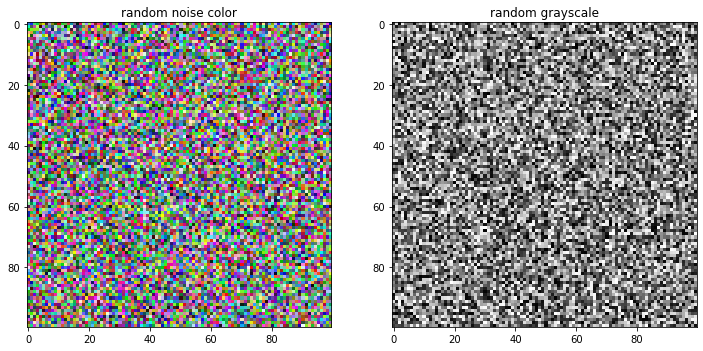

In [6]:
random_noise_color = np.random.randint(0, high = 256, size = (100, 100, 3), dtype = np.uint8)
random_grayscale = np.random.randint(0, high = 256, size = (100, 100), dtype = np.uint8)

# Create figure for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display the random color image
ax1.imshow(random_noise_color)
ax1.set_title("random noise color")

# Display the grayscale image
ax2.imshow(random_grayscale, cmap='gray')
ax2.set_title("random grayscale")

plt.show()

Q2. Convert the code chunk found under section Divide an image into smaller patches using cropping into a function with the following signature:
  crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)<br>
* img is the source image<br>
* num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes. line_color is the color of the grid line.<br>
* The output of the function should be image with grids

In [7]:
img = cv.imread("images/dog.jfif")
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    img_copy = img.copy()

    # Get the height and weight of the image
    h, w = img.shape[:2]

    # Calculate the size of each patch
    M, N = h // num_vertical_grid, w // num_horizontal_grid
    
    tiles = []

    # Iterate over the image
    for y in range(0, h, M):
        for x in range(0, w, N):
            
            x1 = x + N
            y1 = y + M
        
            if x1 > w and y1 > h:
                x1 = w - 1
                y1 = h - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:h, x:w]
                tiles.append(tile)
            
            elif x1 > w:
                x1 = w -1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:y1, x:w]
                tiles.append(tile)
            
            elif y1 > h:
                y1 = h -1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:h, x:x1]
                tiles.append(tile)
            
            else:
                cv.rectangle(img_copy, (x, y), (x1, y1),  line_color, 1)
                tile = img[y:y1, x:w]
                tiles.append(tile)
            
    show_img("Cropped image", img_copy)


crop_grid(img, 3, 3, (0, 255, 0))

Q3. Display image sequences of smooth transition of two images with different values of α . Refer to code in section "Image blending". Use "lena.jfif" and "coins.jfif" as the base images.



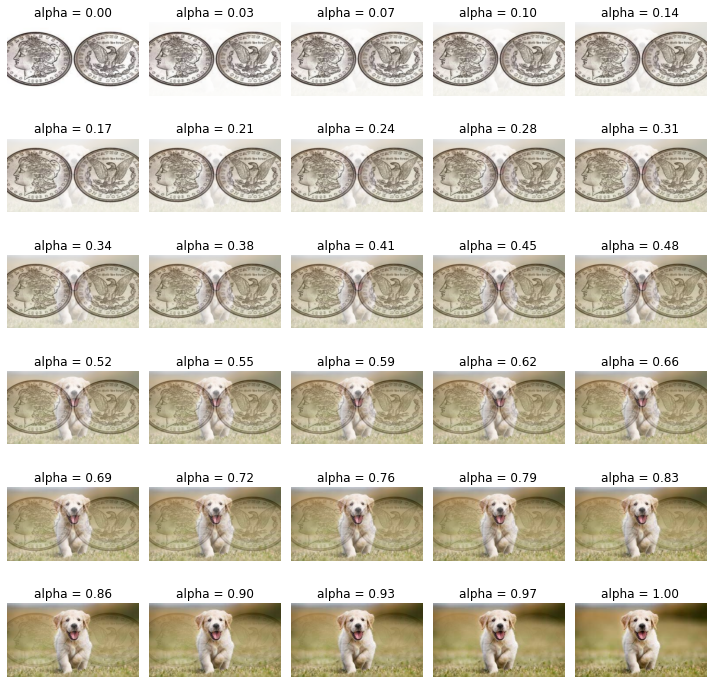

In [13]:
img1 = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))
alphas = np.linspace(0, 1, 10)


# Create a figure
fig = plt.figure(figsize=(10, 10))

# For each alpha, blend the images and add a subplot showing the result
for i, alpha in enumerate(alphas, 1):
    blended = cv.addWeighted(img, alpha, img2, 1 - alpha, 0)
    ax = fig.add_subplot(6, 5, i)
    ax.imshow(cv.cvtColor(blended, cv.COLOR_BGR2RGB))  # Convert color from BGR to RGB
    ax.set_title(f'alpha = {alpha:.2f}')
    ax.axis('off')

plt.tight_layout()
plt.show()

Q4. Suppose you are a digital content creator and wish to share photo online. However, you wish to protect these images from being stolen or altered by others. Leverage your image processing knowledge to apply watermark on image "travel_hd.jpg". The example of resulting watermarked image are as shown in the following: activity_image